# Gojek DS Bootcamp Day 2: Supervised Learning
## Session 2: Classification

In this session, we will see how machine learning can be used to predict categorical things or usually called classification task. We'll start from the basic binary classification, which means, we only want to differentiate between 2 classes. Somestimes dubbed as positive or negative class

We'll start our journey from arguably the simplest classification algorithm, logistic regression, which in different literature will be called single layer neural network. Then we'll work our way to the more complex one, decision tree.

### Logistic Regression
Logistic regression can be viewed as extension from previously explained linear regression. Where now the output is squeezed through a function so the value output range from 0 to 1 (sigmoid function is one of the most popular choice for this case) and a new loss function that is better suited to this case.

In [6]:
# Let's start from importing all necessary ingredients
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Test easy dataset for logistic regression, should be easy as it name implies
easy = pd.read_csv('easy_dataset.csv')
easy.head()

,x,y,label
0,0.726215,-0.379140,0
1,0.911896,-0.833012,0
2,-0.800304,-1.079652,0
3,0.125354,-1.245371,0
4,-1.773176,0.336990,0


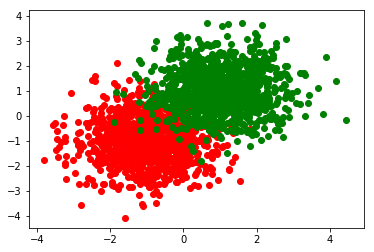

In [24]:
# First things first, when you import and working on new dataset, is to plot it
# especially since the dimensional is low enough
fig, ax = plt.subplots()

ax.scatter(x='x', y='y', data=easy[easy['label'] == 0], color='red')
ax.scatter(x='x', y='y', data=easy[easy['label'] == 1], color='green')

In [11]:
# Looking at the plot, it should be linearly separable, right up the alley for logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X=easy[['x', 'y']], y=easy['label'])

/Users/miqbaltawakal/workspace/lingkungan_belajar/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
prediction = logreg.predict(easy[['x', 'y']])

In [17]:
# First, we'll see the training error
from sklearn.metrics import accuracy_score

accuracy_score(easy['label'], prediction)

0.9445

In [19]:
# Next, let's properly evaluate the performance, by splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(easy[['x', 'y']], easy['label'])

In [71]:
def decision_boundary(model, df):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    max_x = np.max(df['x'])
    max_y = np.max(df['y'])
    
    xs = np.linspace(-max_x, max_x, 200)
    ys = np.linspace(-max_x, max_y, 200)
    zs = np.zeros((200, 200))

    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            zs[j, i] = model.predict(np.array([[x, y]]))[0]

    ax.contour(xs, ys, zs, levels=(-1, 0, 1), linewidths=2, colors='black', alpha=0.5)
    ax.contourf(xs, ys, zs, levels=(-1, 0, 1), colors=('#ff0000', '#00ff00'), alpha=0.2)

    ax.scatter(x='x', y='y', data=df[df['label'] == 0], color='red')
    ax.scatter(x='x', y='y', data=df[df['label'] == 1], color='green')
    
    ax.set_xlim((-max_x, max_x))
    ax.set_ylim((-max_y, max_y))

/Users/miqbaltawakal/workspace/lingkungan_belajar/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


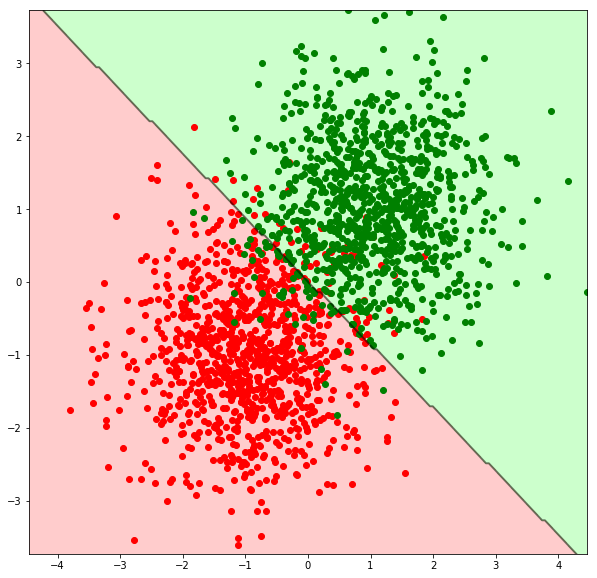

In [32]:
# Let's take a look at the decision boundary
decision_boundary(logreg, easy)

In [20]:
# Look deeper into logistic regression hyperparameter

In [12]:
# Test medium dataset for logistic regression
medium = pd.read_csv('medium_dataset.csv')
medium.head()

,x,y,label
0,0.471969,0.290023,0
1,-0.647295,-0.637178,0
2,-0.551973,-1.019000,0
3,-0.150224,0.636008,0
4,-0.335839,0.642716,0


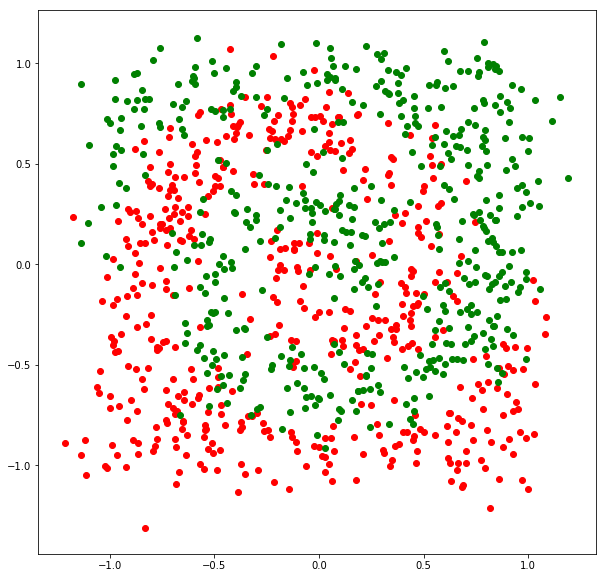

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x='x', y='y', data=medium[medium['label'] == 0], color='red')
ax.scatter(x='x', y='y', data=medium[medium['label'] == 1], color='green')

In [45]:
# This should be interesting
logreg2 = LogisticRegression()
logreg2.fit(X=medium[['x', 'y']], y=medium['label'])

/Users/miqbaltawakal/workspace/lingkungan_belajar/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
prediction = logreg2.predict(medium[['x', 'y']])
accuracy_score(medium['label'], prediction)

0.67

/Users/miqbaltawakal/workspace/lingkungan_belajar/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


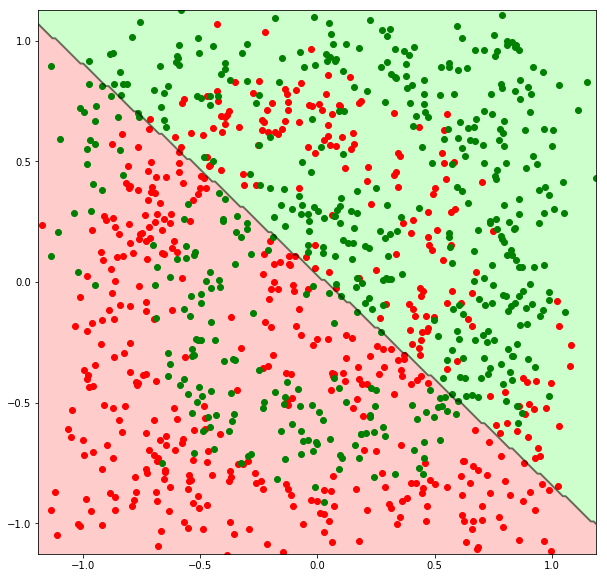

In [48]:
decision_boundary(logreg2, medium)

In [58]:
# Manual explicit transformation
transformed = medium.copy(deep=True)
transformed['xx'] = transformed['x']*transformed['x']
transformed['yy'] = transformed['y']*transformed['y']
transformed['xy'] = transformed['x']*transformed['y']

In [63]:
logreg2.fit(X=transformed[['x', 'y', 'xx', 'yy', 'xy']], y=transformed['label'])

/Users/miqbaltawakal/workspace/lingkungan_belajar/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

/Users/miqbaltawakal/workspace/lingkungan_belajar/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


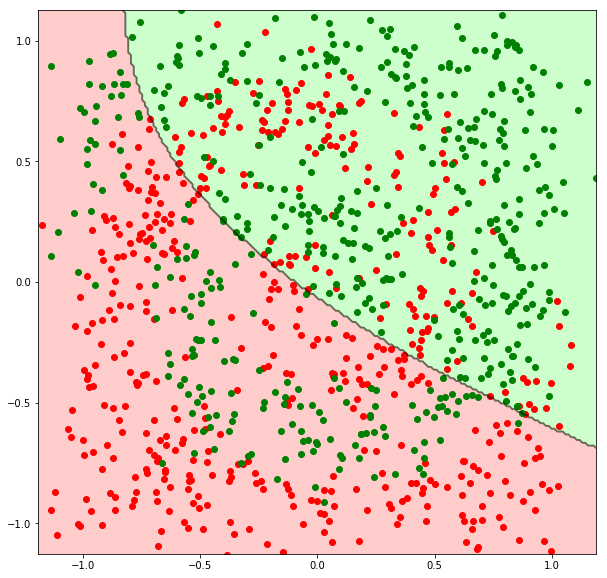

In [64]:
def decision_boundary2(model, df):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    max_x = np.max(df['x'])
    max_y = np.max(df['y'])
    
    xs = np.linspace(-max_x, max_x, 200)
    ys = np.linspace(-max_x, max_y, 200)
    zs = np.zeros((200, 200))

    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            zs[j, i] = model.predict(np.array([[x, y, x*x, y*y, x*y]]))[0]

    ax.contour(xs, ys, zs, levels=(-1, 0, 1), linewidths=2, colors='black', alpha=0.5)
    ax.contourf(xs, ys, zs, levels=(-1, 0, 1), colors=('#ff0000', '#00ff00'), alpha=0.2)

    ax.scatter(x='x', y='y', data=df[df['label'] == 0], color='red')
    ax.scatter(x='x', y='y', data=df[df['label'] == 1], color='green')
    
    ax.set_xlim((-max_x, max_x))
    ax.set_ylim((-max_y, max_y))

decision_boundary2(logreg2, transformed)

In [65]:
# We'll see that by transforming into higher dimension, we can have non-linear decision boundary in the original space
# However, the worked transformation have to be tailored into each different specific dataset
# Also the resulting model is less compared to original data

### Decision Tree
In this part we will take a look a more complex model in the form of decision tree. We'll see how  


#### A quick detour into information theory

##### Entropy

##### Information gain
This is one of the splitting criterion for decision tree


In [66]:
from sklearn.tree import DecisionTreeClassifier

dec = DecisionTreeClassifier()
dec.fit(X=medium[['x', 'y']], y=medium['label'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
pred = dec.predict(medium[['x', 'y']])
accuracy_score(medium['label'], pred)

1.0

/Users/miqbaltawakal/workspace/lingkungan_belajar/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


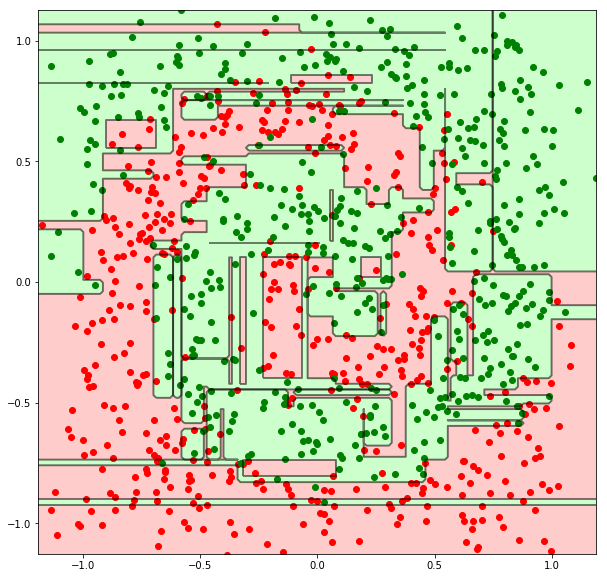

In [72]:
decision_boundary(dec, medium)

/Users/miqbaltawakal/workspace/lingkungan_belajar/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


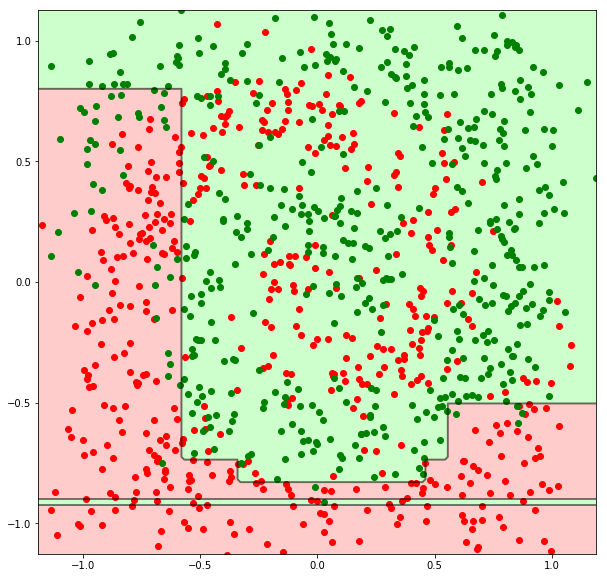

In [75]:
# Test decision tree hyperparameter

dec = DecisionTreeClassifier(max_depth=4)
dec.fit(X=medium[['x', 'y']], y=medium['label'])
decision_boundary(dec, medium)

That's how decision tree works, with its strength and weaknesses.

Next session we'll how to extend it to overcome some of the weaknessto become even better classifier using ensemble technique. Stay tuned!

### Exercise
In this exercise session, you will be using all the techniques that you are already learned, and then apply it real world dataset.

We will be using Adult dataset from UCI machine learning repository. Download them here: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data